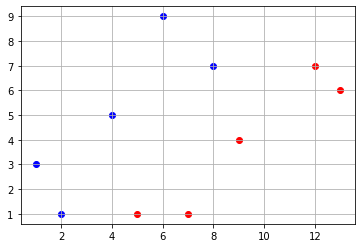

In [2]:
import pandas as pd;
from numpy import *
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
donnees=pd.read_csv("pointsSVM.csv",sep=';')
donnees=array(donnees);
x=donnees[:,0:2]
y=donnees[:,2]
axes=plt.axes()
axes.grid()
plt.scatter(x[y==+1][:,0],x[y==+1][:,1],color='r')
plt.scatter(x[y==-1][:,0],x[y==-1][:,1],color='b')



In [4]:
def f(X,Beta):
    return Beta[0]+sum(X.T*Beta[1:])
def classer(X,Beta):
    return int(sign(f(X,Beta)))
from sklearn.svm import LinearSVC, SVC
lsvm=LinearSVC(C=10000);X_train=donnees[:,0:2];y_train=donnees[:,2]
lsvm.fit(X_train,y_train);score=lsvm.score(X_train,y_train)
print(score)
Beta=list(lsvm.intercept_)+list(lsvm.coef_[0])
print(Beta)
plt.show()


1.0
[-1.5553590499678744, 0.6665881884457708, -0.7776917251754559]


NameError: name 'X' is not defined

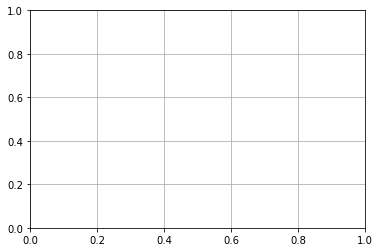

In [6]:
axes = plt.axes(); axes.grid()
plt.scatter(x[y ==+1][:, 0], X[y ==+1][:, 1], color='r')
plt.scatter(x[y ==-1][:, 0], X[y == -1][:, 1], color='b')
Bleu=[]; Rouge=[]; milieu=[]
for abscisseX in range(1,13):
    y=-1.0*(Beta[0]+Beta[1]*abscisseX+1)/Beta[2];Bleu+=[y]
    y=-1.0*(Beta[0]+Beta[1]*abscisseX-1)/Beta[2]; Rouge+=[y]
    y=-1.0*(Beta[0]+Beta[1]*abscisseX)/Beta[2];milieu+=[y]
plt.plot(arange(1,13),Bleu,color='b')
plt.plot(arange(1,13), Rouge, color='r')
plt.plot(arange(1,13),milieu,color='g')
plt.show()
print(Beta)
print('[5,1]==›',f(array([5,1]),Beta));print('[2,1]',f(array([2,1]),Beta))
print('[6,9]==›',f(array([6,9]),Beta));print('[12,2]',f(array([12,1]),Beta))

IndexError: boolean index did not match indexed array along dimension 0; dimension is 10 but corresponding boolean dimension is 15

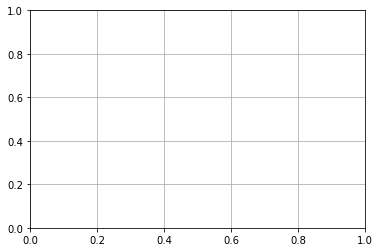

In [8]:
import pandas as pd ; from numpy import *
import matplotlib.pyplot as plt 
donnees = pd.read_csv("pointsSVM100.csv",sep=';')
donnees = array(donnees); X =donnees[:,0:2]; y = donnees[:,2]
axes = plt.axes(); axes.grid()
plt.scatter(X[y ==+1 ][:,0], x[y==+1][:,1], color='r')
plt.scatter(X[y ==-1 ][:,0], x[y==-1][:,1], color='b')
def f(X,Beta):
  return Beta[0]+sum(X.T*Beta[1:])

def classer(X,Beta):
  return int(sign(f(X,Beta)))


from sklearn.svm import LinearSVC ,SVC,NuSVC
X_tr = donnees[:,0:2];y_tr = donnees[:,2]
lsvm = SVC(gamma = 'auto');lsvm.fit(X_tr, y_tr);
score = lsvm.score(X_tr,y_tr);print(score)
lsvm = NuSVC(gamma='auto');lsvm.fit(X_tr, y_tr);
score  = lsvm.score(X_tr,y_tr);print(score);
lsvm = LinearSVC(C=1000);lsvm.fit(X_tr,y_tr);
score = lsvm.score(X_tr,y_tr);print(score);
Beta = list(lsvm.intercept_)+list(lsvm.coef_[0]);print(Beta)
plt.show()


In [5]:
with open("reviews.txt") as f:
  reviews = f.read().split("\n")

with open("labels.txt") as f:
  labels = f.read().split("\n")
len(labels)

from sklearn.svm import LinearSVC ,SVC,NuSVC

reviews_tokens = [review.split() for review in reviews]

from sklearn.preprocessing import MultiLabelBinarizer

MLB = MultiLabelBinarizer()

MLB. fit (reviews_tokens)


from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test= train_test_split(\
                                                   reviews_tokens, labels, test_size=0.25, random_state=None)



lsvm = LinearSVC(); 
lsvm.fit (MLB.transform(X_train), y_train) 
score=lsvm.score (MLB. transform (X_test), y_test); print (score*100,'%')
score=lsvm.score (MLB. transform (X_train), y_train); print (score*100,'%')




87.76 %
100.0 %


In [2]:
print(reviews_tokens)

NameError: name 'reviews_tokens' is not defined

In [46]:
filenames = ["28 articles société.txt","29 articles sport.txt","20 articles ecomonie.txt", "28 articles politique.txt", "36 articles culture.txt"] 
with open("articles.txt", 'w', encoding="utf8") as outfile: 
    for fname in filenames:
        with open(fname, encoding="utf8") as infile: 
            for line in infile: 
                outfile.write(line)
                





In [182]:
import re
with open("articles.txt", encoding="utf8") as f:
  articles = f.read()


pattern = r'-+[0-9]+-+'
result = re.split(pattern,articles)

result


['',
 '\nVoici cinq points clés du Programme d’Innovation Entrepreneuriale (PIE), élaboré conjointement par l’Office de la formation professionnelle et de la promotion du travail (OFPPT) et l’Université Mohammed VI Polytechnique (UM6P) de Benguérir:\n\n1. Objectifs du PIE:\n– Redéfinir l’approche du développement de l’esprit d’entrepreneuriat chez les jeunes stagiaires de l’OFPPT.\n\n– Doter les jeunes de compétences de bases et d’approches innovantes pour la résolution des problèmes.\n\n– Faire adhérer les jeunes stagiaires à l’approche entrepreneuriale, révéler leur potentiel et stimuler leur intérêt à l’entrepreneuriat.\n\n– Apprendre aux jeunes à s’approprier des outils d’entrepreneur.\n\n– Prendre en conscience la multitude d’opportunités qui existent sur le marché.\n\n2. Un déploiement en deux étapes:\n– Le PIE se concrétisera à travers une série de modules de formations présentiels et virtuels dans une approche innovante orientée learning by doing.\n\n– Formation des formateurs:

In [197]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def netoyage(corpus_ensemble_documents):
    for i in range(len(corpus_ensemble_documents)):
        corpus_ensemble_documents[i]=corpus_ensemble_documents[i].lower()
    for i in range(len(corpus_ensemble_documents)):
        for c in string.punctuation:
            x=corpus_ensemble_documents[i].replace(c,' ')
            corpus_ensemble_documents[i]=x
    stopwords_anglais=stopwords.words('french')
    for i in range(len(corpus_ensemble_documents)):
        L=corpus_ensemble_documents[i].split()
        for mot in L:
            if mot in stopwords_anglais:
                while mot in L:
                    L.remove(mot)
                    
        corpus_ensemble_documents[i]=" ".join(L)
    return(corpus_ensemble_documents)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [199]:
data=netoyage(result)
len(data)
data

['voici cinq points clés programme d’innovation entrepreneuriale pie élaboré conjointement l’office formation professionnelle promotion travail ofppt l’université mohammed vi polytechnique um6p benguérir 1 objectifs pie – redéfinir l’approche développement l’esprit d’entrepreneuriat chez jeunes stagiaires l’ofppt – doter jeunes compétences bases d’approches innovantes résolution problèmes – faire adhérer jeunes stagiaires l’approche entrepreneuriale révéler potentiel stimuler intérêt l’entrepreneuriat – apprendre jeunes s’approprier outils d’entrepreneur – prendre conscience multitude d’opportunités existent marché 2 déploiement deux étapes – pie concrétisera travers série modules formations présentiels virtuels approche innovante orientée learning – formation formateurs montée compétences garantie formateurs ofppt bénéficieront séances coaching formation suivant approche pédagogique innovante – autonomisation formateurs ofppt travers apprentissage expérimentation programme permettra j

In [200]:
                
articles_tokens = [article.split() for article in data]

from sklearn.preprocessing import MultiLabelBinarizer

MLB = MultiLabelBinarizer()

MLB.fit(articles_tokens)

print(MLB.fit (articles_tokens))


MultiLabelBinarizer()


In [201]:
labels=open("labels2.txt","w",encoding="utf8")
    

In [219]:
for i in range(1,len(data)):
    if i<=28:
        labels.write("société")
    if 28<i<=57:
        labels.write("sport")
    if 57<i<=77:
        labels.write("ecomonie")
    if 77<i<=105:
        labels.write("politique")
    if 105<i<=141:
        labels.write("culture")

In [215]:

len(data)


141

In [216]:
with open("labels2.txt", encoding="utf8") as f:
  labels2 = f.read().split("\n")

In [217]:

len(labels2)

1

In [209]:

from sklearn.svm import LinearSVC ,SVC,NuSVC
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test= train_test_split(\
                                                   articles_tokens, labels2, test_size=0.25, random_state=None)



lsvm = NuSVC(gamma="auto"); 
lsvm.fit (MLB.transform(X_train), y_train) 
score=lsvm.score (MLB.transform (X_test), y_test); print (score*100,'%')

ValueError: Found input variables with inconsistent numbers of samples: [141, 1]

In [100]:
lsvm = SVC(gamma="auto"); 
lsvm.fit (MLB.transform(X_train), y_train) 
score=lsvm.score (MLB.transform (X_test), y_test); print (score*100,'%')

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:860: UserWarning: unknown class(es) ['!', '%', '%)', '%),', '%).', '%,', '%.', '&', '(', '(+0,96%).', '(+1,24%)', '(+2,05%).', '(+2,11%)', '(+2,85%', '(+29,3', '(+3,05%),', '(+41,84', '(+5,42%),', '(-10,19', '(-27,09', '(-4,86%).', '(-5,25%).', '(-7,72%)', '(-8,21%),', '(-8,22%),', '(-8,32%),', '(0', '(0-1),', '(0-1).', '(0-1,', '(0-1/3-1),', '(0-2,', '(0.13', '(0.15', '(1)', '(1,68', '(1,71', '(1-0),', '(1-0).', '(1-1', '(1-1,', '(1-2,', '(1-3,', '(12', '(12,02', '(120,21', '(13', '(14)', '(15', '(15),', '(16', '(163,24', '(16e)', '(1956-1960),', '(1989,', '(1998,', '(2),', '(2,26', '(2-0),', '(2-0).', '(2.000', '(2.500)', '(2003,', '(2008', '(2014)', '(2020-2021)', '(2020-2021),', '(2021),', '(21', '(21e).', '(24,51', '(25.000', '(28e).', '(29', '(3-0),', '(3-1)', '(3-1),', '(3-1/2-3', '(3-4/3-1', '(30è),', '(31', '(31,05', '(324,11', '(33.0%)', '(37),', '(38,48', '(4-0).', '(43e),', '(43e).', '(45e+1).', '(4

30.555555555555557 %


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:860: UserWarning: unknown class(es) ['!', '%', '%).', '%.', '&', '(0', '(0,9', '(0.14', '(1-0)', '(1-2)', '(15e),', '(2014)', '(2014,', '(2017,', '(26è),', '(3-1),', '(32è)', '(4)', '(4à', '(64è,', '(76è).', '(Ayoub', '(BAD),', '(CGLU', '(CNOM)', '(CNT),', '(CORCAS)', '(Covid-19).', '(DGSN)', '(DGSN),', '(DGSN).', '(DGST),', '(Espagne)', '(GME)…', '(GPBM)', '(ICOMOS', '(Jardins', '(Junalco)', '(L’Uzine).', '(MAP),', '(MMDH)', '(MSP),', '(Mohammedia', '(OCBC),', '(ONEE)', '(ONHYM),', '(ONMT),', '(ONSSA)', '(OUA),', '(Ontario,', '(Russie-2018),', '(SIEL)', '(SNRT)', '(UA),', '(UE)-Union', '(Union', '(al', '(ayant', '(du', '(gagnant-gagnant)', '(histoire', '(jahim', '(littérature,', '(mi-temps', '(shambo', '(«', '(…)', '-Massa', '-Ou-Tanane', '/', '0', '0,', '0,2', '0-2),', '0.3', '000', '06', '09', '1', '1,', '1,38', '1,8', '1.150.599', '1.150.808', '1.168.303', '1.168.664', '1.200', '1.628', '1.700', '1.779', '1

In [160]:
lsvm = LinearSVC(); 
lsvm.fit (MLB.transform(X_train), y_train)
y_pred=lsvm.predict(MLB.transform(X_test))
print ("score :",lsvm.score(y_test,y_pred))

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:860: UserWarning: unknown class(es) ['!', '%', '%)', '%),', '%).', '%,', '%.', '&', '(', '(+0,96%).', '(+1,24%)', '(+2,05%).', '(+2,11%)', '(+2,85%', '(+29,3', '(+3,05%),', '(+41,84', '(+5,42%),', '(-10,19', '(-27,09', '(-4,86%).', '(-5,25%).', '(-7,72%)', '(-8,21%),', '(-8,22%),', '(-8,32%),', '(0', '(0-1),', '(0-1).', '(0-1,', '(0-1/3-1),', '(0-2,', '(0.13', '(0.15', '(1)', '(1,68', '(1,71', '(1-0),', '(1-0).', '(1-1', '(1-1,', '(1-2,', '(1-3,', '(12', '(12,02', '(120,21', '(13', '(14)', '(15', '(15),', '(16', '(163,24', '(16e)', '(1956-1960),', '(1989,', '(1998,', '(2),', '(2,26', '(2-0),', '(2-0).', '(2.000', '(2.500)', '(2003,', '(2008', '(2014)', '(2020-2021)', '(2020-2021),', '(2021),', '(21', '(21e).', '(24,51', '(25.000', '(28e).', '(29', '(3-0),', '(3-1)', '(3-1),', '(3-1/2-3', '(3-4/3-1', '(30è),', '(31', '(31,05', '(324,11', '(33.0%)', '(37),', '(38,48', '(4-0).', '(43e),', '(43e).', '(45e+1).', '(4

ValueError: Expected 2D array, got 1D array instead:
array=['sport ' 'culture ' 'ecomonie ' 'sport ' 'sport ' 'société ' 'politique '
 'ecomonie ' 'ecomonie ' 'culture ' 'sport ' 'culture ' 'ecomonie '
 'politique ' 'culture ' 'politique ' 'société ' 'culture ' 'sport '
 'sport ' 'société ' 'société ' 'culture ' 'culture ' 'société '
 'politique ' 'culture ' 'culture ' 'société ' 'culture ' 'sport '
 'culture ' 'ecomonie ' 'politique ' 'sport ' 'sport '].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [120]:
from sklearn import linear_model
modele_logit =linear_model.LogisticRegression()
modele_logit.fit(MLB.transform(X_train), y_train)
score = modele_logit.score(MLB.transform (X_test), y_test)
print (score*100,"%")

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:860: UserWarning: unknown class(es) ['!', '%', '%)', '%),', '%).', '%,', '%.', '&', '(', '(+0,96%).', '(+1,24%)', '(+2,05%).', '(+2,11%)', '(+2,85%', '(+29,3', '(+3,05%),', '(+41,84', '(+5,42%),', '(-10,19', '(-27,09', '(-4,86%).', '(-5,25%).', '(-7,72%)', '(-8,21%),', '(-8,22%),', '(-8,32%),', '(0', '(0-1),', '(0-1).', '(0-1,', '(0-1/3-1),', '(0-2,', '(0.13', '(0.15', '(1)', '(1,68', '(1,71', '(1-0),', '(1-0).', '(1-1', '(1-1,', '(1-2,', '(1-3,', '(12', '(12,02', '(120,21', '(13', '(14)', '(15', '(15),', '(16', '(163,24', '(16e)', '(1956-1960),', '(1989,', '(1998,', '(2),', '(2,26', '(2-0),', '(2-0).', '(2.000', '(2.500)', '(2003,', '(2008', '(2014)', '(2020-2021)', '(2020-2021),', '(2021),', '(21', '(21e).', '(24,51', '(25.000', '(28e).', '(29', '(3-0),', '(3-1)', '(3-1),', '(3-1/2-3', '(3-4/3-1', '(30è),', '(31', '(31,05', '(324,11', '(33.0%)', '(37),', '(38,48', '(4-0).', '(43e),', '(43e).', '(45e+1).', '(4

69.44444444444444 %


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:860: UserWarning: unknown class(es) ['!', '%', '%).', '%.', '&', '(0', '(0,9', '(0.14', '(1-0)', '(1-2)', '(15e),', '(2014)', '(2014,', '(2017,', '(26è),', '(3-1),', '(32è)', '(4)', '(4à', '(64è,', '(76è).', '(Ayoub', '(BAD),', '(CGLU', '(CNOM)', '(CNT),', '(CORCAS)', '(Covid-19).', '(DGSN)', '(DGSN),', '(DGSN).', '(DGST),', '(Espagne)', '(GME)…', '(GPBM)', '(ICOMOS', '(Jardins', '(Junalco)', '(L’Uzine).', '(MAP),', '(MMDH)', '(MSP),', '(Mohammedia', '(OCBC),', '(ONEE)', '(ONHYM),', '(ONMT),', '(ONSSA)', '(OUA),', '(Ontario,', '(Russie-2018),', '(SIEL)', '(SNRT)', '(UA),', '(UE)-Union', '(Union', '(al', '(ayant', '(du', '(gagnant-gagnant)', '(histoire', '(jahim', '(littérature,', '(mi-temps', '(shambo', '(«', '(…)', '-Massa', '-Ou-Tanane', '/', '0', '0,', '0,2', '0-2),', '0.3', '000', '06', '09', '1', '1,', '1,38', '1,8', '1.150.599', '1.150.808', '1.168.303', '1.168.664', '1.200', '1.628', '1.700', '1.779', '1

In [119]:
from sklearn import linear_model
modele_logit =linear_model.LogisticRegression(penalty='l2')
modele_logit.fit(MLB.transform(X_train), y_train)
score = modele_logit.score(MLB.transform (X_test), y_test)
print (score*100,"%")

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:860: UserWarning: unknown class(es) ['!', '%', '%)', '%),', '%).', '%,', '%.', '&', '(', '(+0,96%).', '(+1,24%)', '(+2,05%).', '(+2,11%)', '(+2,85%', '(+29,3', '(+3,05%),', '(+41,84', '(+5,42%),', '(-10,19', '(-27,09', '(-4,86%).', '(-5,25%).', '(-7,72%)', '(-8,21%),', '(-8,22%),', '(-8,32%),', '(0', '(0-1),', '(0-1).', '(0-1,', '(0-1/3-1),', '(0-2,', '(0.13', '(0.15', '(1)', '(1,68', '(1,71', '(1-0),', '(1-0).', '(1-1', '(1-1,', '(1-2,', '(1-3,', '(12', '(12,02', '(120,21', '(13', '(14)', '(15', '(15),', '(16', '(163,24', '(16e)', '(1956-1960),', '(1989,', '(1998,', '(2),', '(2,26', '(2-0),', '(2-0).', '(2.000', '(2.500)', '(2003,', '(2008', '(2014)', '(2020-2021)', '(2020-2021),', '(2021),', '(21', '(21e).', '(24,51', '(25.000', '(28e).', '(29', '(3-0),', '(3-1)', '(3-1),', '(3-1/2-3', '(3-4/3-1', '(30è),', '(31', '(31,05', '(324,11', '(33.0%)', '(37),', '(38,48', '(4-0).', '(43e),', '(43e).', '(45e+1).', '(4

69.44444444444444 %


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:860: UserWarning: unknown class(es) ['!', '%', '%).', '%.', '&', '(0', '(0,9', '(0.14', '(1-0)', '(1-2)', '(15e),', '(2014)', '(2014,', '(2017,', '(26è),', '(3-1),', '(32è)', '(4)', '(4à', '(64è,', '(76è).', '(Ayoub', '(BAD),', '(CGLU', '(CNOM)', '(CNT),', '(CORCAS)', '(Covid-19).', '(DGSN)', '(DGSN),', '(DGSN).', '(DGST),', '(Espagne)', '(GME)…', '(GPBM)', '(ICOMOS', '(Jardins', '(Junalco)', '(L’Uzine).', '(MAP),', '(MMDH)', '(MSP),', '(Mohammedia', '(OCBC),', '(ONEE)', '(ONHYM),', '(ONMT),', '(ONSSA)', '(OUA),', '(Ontario,', '(Russie-2018),', '(SIEL)', '(SNRT)', '(UA),', '(UE)-Union', '(Union', '(al', '(ayant', '(du', '(gagnant-gagnant)', '(histoire', '(jahim', '(littérature,', '(mi-temps', '(shambo', '(«', '(…)', '-Massa', '-Ou-Tanane', '/', '0', '0,', '0,2', '0-2),', '0.3', '000', '06', '09', '1', '1,', '1,38', '1,8', '1.150.599', '1.150.808', '1.168.303', '1.168.664', '1.200', '1.628', '1.700', '1.779', '1

In [155]:
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import *
clf_gini = DecisionTreeClassifier(criterion = "gini") 
clf_gini.fit(MLB.transform(X_train),y_train)
clf_entropy = DecisionTreeClassifier(criterion = "entropy") 
clf_entropy.fit(MLB.transform(X_train), y_train) 
print("Results Using Gini Index:") 
y_pred_gini = clf_gini.predict(MLB.transform(X_test))
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred_gini)) 
print ("Accuracy : ",accuracy_score(y_test,y_pred_gini)*100,"%") 
print("Results Using Entropy:") 
y_pred_entropy = clf_entropy.predict(MLB.transform(X_test)) 
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred_entropy))      
print ("Accuracy : ",accuracy_score(y_test,y_pred_entropy)*100,"%") 

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:860: UserWarning: unknown class(es) ['!', '%', '%)', '%),', '%).', '%,', '%.', '&', '(', '(+0,96%).', '(+1,24%)', '(+2,05%).', '(+2,11%)', '(+2,85%', '(+29,3', '(+3,05%),', '(+41,84', '(+5,42%),', '(-10,19', '(-27,09', '(-4,86%).', '(-5,25%).', '(-7,72%)', '(-8,21%),', '(-8,22%),', '(-8,32%),', '(0', '(0-1),', '(0-1).', '(0-1,', '(0-1/3-1),', '(0-2,', '(0.13', '(0.15', '(1)', '(1,68', '(1,71', '(1-0),', '(1-0).', '(1-1', '(1-1,', '(1-2,', '(1-3,', '(12', '(12,02', '(120,21', '(13', '(14)', '(15', '(15),', '(16', '(163,24', '(16e)', '(1956-1960),', '(1989,', '(1998,', '(2),', '(2,26', '(2-0),', '(2-0).', '(2.000', '(2.500)', '(2003,', '(2008', '(2014)', '(2020-2021)', '(2020-2021),', '(2021),', '(21', '(21e).', '(24,51', '(25.000', '(28e).', '(29', '(3-0),', '(3-1)', '(3-1),', '(3-1/2-3', '(3-4/3-1', '(30è),', '(31', '(31,05', '(324,11', '(33.0%)', '(37),', '(38,48', '(4-0).', '(43e),', '(43e).', '(45e+1).', '(4

Results Using Gini Index:
Confusion Matrix:  [[3 2 1 2 3]
 [1 2 0 1 1]
 [1 2 1 1 0]
 [0 0 1 5 0]
 [0 0 3 2 4]]
Accuracy :  41.66666666666667 %
Results Using Entropy:
Confusion Matrix:  [[3 2 1 2 3]
 [2 1 1 0 1]
 [1 2 1 1 0]
 [1 0 1 4 0]
 [0 1 0 2 6]]
Accuracy :  41.66666666666667 %


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:860: UserWarning: unknown class(es) ['!', '%', '%).', '%.', '&', '(0', '(0,9', '(0.14', '(1-0)', '(1-2)', '(15e),', '(2014)', '(2014,', '(2017,', '(26è),', '(3-1),', '(32è)', '(4)', '(4à', '(64è,', '(76è).', '(Ayoub', '(BAD),', '(CGLU', '(CNOM)', '(CNT),', '(CORCAS)', '(Covid-19).', '(DGSN)', '(DGSN),', '(DGSN).', '(DGST),', '(Espagne)', '(GME)…', '(GPBM)', '(ICOMOS', '(Jardins', '(Junalco)', '(L’Uzine).', '(MAP),', '(MMDH)', '(MSP),', '(Mohammedia', '(OCBC),', '(ONEE)', '(ONHYM),', '(ONMT),', '(ONSSA)', '(OUA),', '(Ontario,', '(Russie-2018),', '(SIEL)', '(SNRT)', '(UA),', '(UE)-Union', '(Union', '(al', '(ayant', '(du', '(gagnant-gagnant)', '(histoire', '(jahim', '(littérature,', '(mi-temps', '(shambo', '(«', '(…)', '-Massa', '-Ou-Tanane', '/', '0', '0,', '0,2', '0-2),', '0.3', '000', '06', '09', '1', '1,', '1,38', '1,8', '1.150.599', '1.150.808', '1.168.303', '1.168.664', '1.200', '1.628', '1.700', '1.779', '1

In [150]:
clf = DecisionTreeClassifier(max_depth=50)
clf = clf.fit(MLB.transform(X_train), y_train)
print(clf.score(MLB.transform(X_test), y_test)*100,"%")
clf = DecisionTreeClassifier(min_samples_split=40)
clf = clf.fit(MLB.transform(X_train), y_train)
print(clf.score(MLB.transform(X_test), y_test)*100,"%")

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:860: UserWarning: unknown class(es) ['!', '%', '%)', '%),', '%).', '%,', '%.', '&', '(', '(+0,96%).', '(+1,24%)', '(+2,05%).', '(+2,11%)', '(+2,85%', '(+29,3', '(+3,05%),', '(+41,84', '(+5,42%),', '(-10,19', '(-27,09', '(-4,86%).', '(-5,25%).', '(-7,72%)', '(-8,21%),', '(-8,22%),', '(-8,32%),', '(0', '(0-1),', '(0-1).', '(0-1,', '(0-1/3-1),', '(0-2,', '(0.13', '(0.15', '(1)', '(1,68', '(1,71', '(1-0),', '(1-0).', '(1-1', '(1-1,', '(1-2,', '(1-3,', '(12', '(12,02', '(120,21', '(13', '(14)', '(15', '(15),', '(16', '(163,24', '(16e)', '(1956-1960),', '(1989,', '(1998,', '(2),', '(2,26', '(2-0),', '(2-0).', '(2.000', '(2.500)', '(2003,', '(2008', '(2014)', '(2020-2021)', '(2020-2021),', '(2021),', '(21', '(21e).', '(24,51', '(25.000', '(28e).', '(29', '(3-0),', '(3-1)', '(3-1),', '(3-1/2-3', '(3-4/3-1', '(30è),', '(31', '(31,05', '(324,11', '(33.0%)', '(37),', '(38,48', '(4-0).', '(43e),', '(43e).', '(45e+1).', '(4

44.44444444444444 %
44.44444444444444 %


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:860: UserWarning: unknown class(es) ['!', '%', '%)', '%),', '%).', '%,', '%.', '&', '(', '(+0,96%).', '(+1,24%)', '(+2,05%).', '(+2,11%)', '(+2,85%', '(+29,3', '(+3,05%),', '(+41,84', '(+5,42%),', '(-10,19', '(-27,09', '(-4,86%).', '(-5,25%).', '(-7,72%)', '(-8,21%),', '(-8,22%),', '(-8,32%),', '(0', '(0-1),', '(0-1).', '(0-1,', '(0-1/3-1),', '(0-2,', '(0.13', '(0.15', '(1)', '(1,68', '(1,71', '(1-0),', '(1-0).', '(1-1', '(1-1,', '(1-2,', '(1-3,', '(12', '(12,02', '(120,21', '(13', '(14)', '(15', '(15),', '(16', '(163,24', '(16e)', '(1956-1960),', '(1989,', '(1998,', '(2),', '(2,26', '(2-0),', '(2-0).', '(2.000', '(2.500)', '(2003,', '(2008', '(2014)', '(2020-2021)', '(2020-2021),', '(2021),', '(21', '(21e).', '(24,51', '(25.000', '(28e).', '(29', '(3-0),', '(3-1)', '(3-1),', '(3-1/2-3', '(3-4/3-1', '(30è),', '(31', '(31,05', '(324,11', '(33.0%)', '(37),', '(38,48', '(4-0).', '(43e),', '(43e).', '(45e+1).', '(4

In [164]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pre=model.predict(X_test)
a=accuracy_score(y_test,y_pre)
print("accuracy score :",a)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (105,) + inhomogeneous part.